# Neural Networks as Curve Fitters
### Demo Notebook (PyTorch + NumPy version included)

## 1. Generate Noisy Data

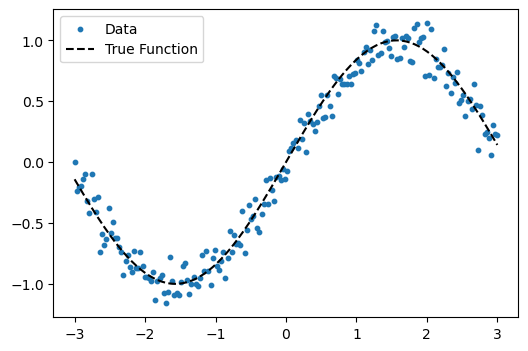

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data
x = torch.linspace(-3, 3, 200).reshape(-1,1)
y_true = torch.sin(x)
y = y_true + 0.1 * torch.randn_like(x)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, label="Data")
plt.plot(x, y_true, 'k--', label="True Function")
plt.legend()
plt.show()


## 2. Baseline: Polynomial Fit

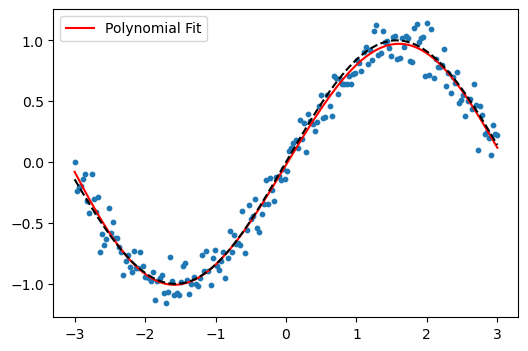

In [5]:
coeff = np.polyfit(x.flatten(), y.flatten(), 5)
poly = np.poly1d(coeff)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10)
plt.plot(x, poly(x.numpy()), 'r', label="Polynomial Fit")
plt.plot(x, y_true, 'k--')
plt.legend()
plt.show()


## 3. Neural Network Fit

In [3]:
import tqdm

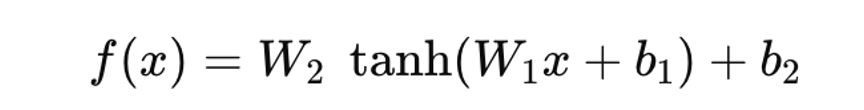

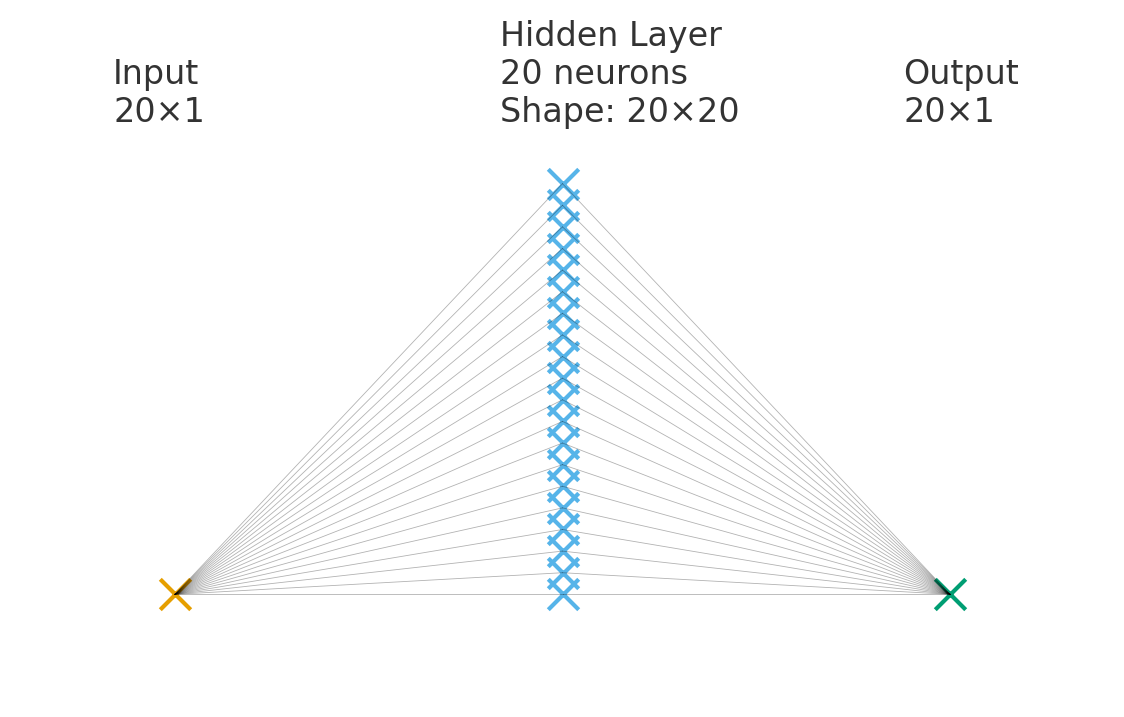

In [34]:
import tqdm

model = nn.Sequential(
    nn.Linear(1, 20),
    nn.Tanh(),
    nn.Linear(20,1)
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

loss_hist = []
for i in range(2000):
    optimizer.zero_grad()
    pred = model(x)
    loss = loss_fn(pred, y)
    loss.backward()
    optimizer.step()
    loss_hist.append(loss.item())
    if np.mod(i, 100) == 0:
        print (i, loss.detach().numpy())

0 0.46700644
100 0.032428715
200 0.022633094
300 0.014684254
400 0.011362969
500 0.010891185
600 0.010729305
700 0.0106409835
800 0.01059055
900 0.010561019
1000 0.010543504
1100 0.010533154
1200 0.010527226
1300 0.010523561
1400 0.010521641
1500 0.010519817
1600 0.010518624
1700 0.010517341
1800 0.010516086
1900 0.010514718


In [35]:
y_pred = model(x)

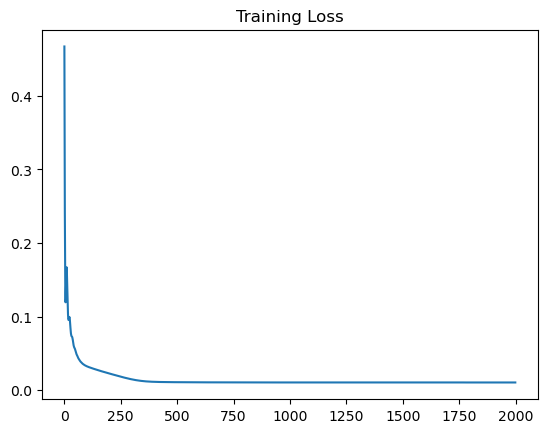

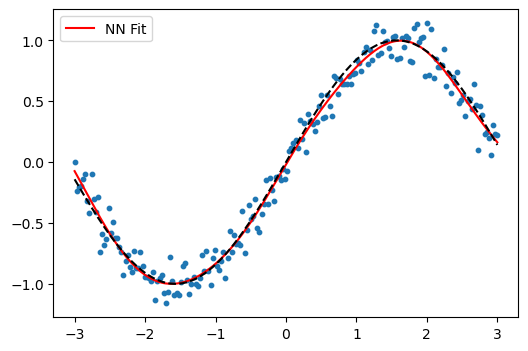

In [36]:
plt.plot(loss_hist)
plt.title("Training Loss")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10)
plt.plot(x, model(x).detach(), 'r', label="NN Fit")
plt.plot(x, y_true, 'k--')
plt.legend()
plt.show()


## 4. Underfitting & Overfitting Exploration

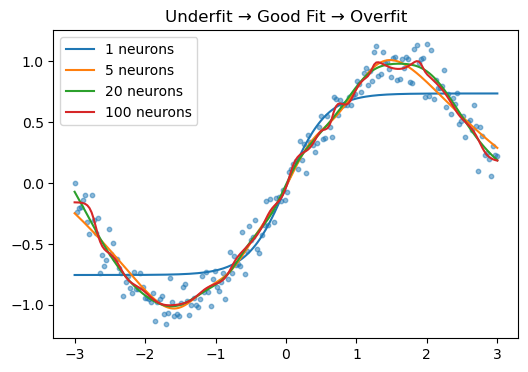

In [41]:
def train_and_plot(hidden):
    model = nn.Sequential(
        nn.Linear(1, hidden),
        nn.Linear(hidden, hidden),
        nn.Linear(hidden, hidden),
        nn.Tanh(),
        nn.Linear(hidden, 1)
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for _ in range(1500):
        optimizer.zero_grad()
        loss = ((model(x) - y)**2).mean()
        loss.backward()
        optimizer.step()
    plt.plot(x, model(x).detach(), label=f"{hidden} neurons")

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, alpha=0.5)

for h in [1, 5, 20, 100]:
    train_and_plot(h)

plt.legend()
plt.title("Underfit → Good Fit → Overfit")
plt.show()
